# Importing the libraries

In [2]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd

# Importing the dataset

In [4]:
df = pd.read_csv('dhaka homeprices.csv')


In [5]:
df

,area,price
0,2600,55000
1,3000,56500
2,3200,61000
3,3600,68000
4,4000,72000
5,5000,71000
6,2500,40000
7,2700,38000
8,1200,17000
9,5000,100000


In [6]:
df.head()

,area,price
0,2600,55000
1,3000,56500
2,3200,61000
3,3600,68000
4,4000,72000


In [7]:
df.head(3)

,area,price
0,2600,55000
1,3000,56500
2,3200,61000


# Plot

In [8]:
df.shape

(10, 2)

In [32]:
df.isnull().any()

area     False
price    False
dtype: bool

In [11]:
df.isnull().sum()

area     0
price    0
dtype: int64

# Separate dependent and independent variable

In [12]:
x = df[['area']]

In [13]:
y = df['price']

# visualization plot

Text(0.5, 1.0, 'Home prices in Dhaka')

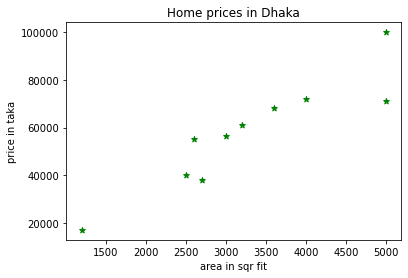

In [60]:
plt.scatter(df['area'],df['price'],marker='*',color='g')
plt.xlabel('area in sqr fit')
plt.ylabel('price in taka')
plt.title("Home prices in Dhaka")

In [61]:
x

,area
0,2600
1,3000
2,3200
3,3600
4,4000
5,5000
6,2500
7,2700
8,1200
9,5000


In [62]:
y

array([59123.64175173])

# Split Data set

In [63]:
from sklearn.model_selection import train_test_split

In [64]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.25, random_state =1)

ValueError: Found input variables with inconsistent numbers of samples: [10, 1]

In [65]:
xtest

,area
2,3200
9,5000
6,2500


In [66]:
xtrain

,area
4,4000
0,2600
3,3600
1,3000
7,2700
8,1200
5,5000


# Fitting Multiple Linear Regression to the Training set


In [35]:
from sklearn.linear_model import LinearRegression


In [36]:
regressor = LinearRegression()

In [37]:
regressor.fit(xtrain, ytrain)

LinearRegression()

In [38]:
regressor.predict(xtest)

array([54577.95521897, 81852.07441554, 43971.35330919])

In [46]:
#one value predict 
regressor.predict([[3500]])

array([59123.64175173])

# Best fit line

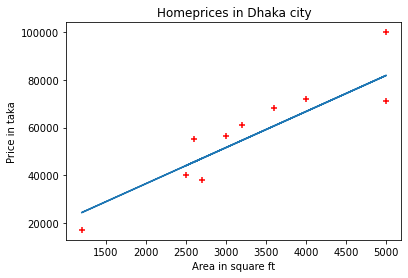

In [40]:
plt.xlabel('Area in square ft')
plt.ylabel('Price in taka')
plt.scatter(df['area'], df['price'],color='red', marker='+')
plt.title('Homeprices in Dhaka city')
#this line for the best fit line
plt.plot(df.area,regressor.predict(df[['area']]))

# Just Checking Value Predicted Value

In [44]:
a = regressor.intercept_

In [45]:
b = regressor.coef_

# As, Y = MX + C , x = 3500

In [47]:
y = b*3500 + a

In [48]:
y

array([59123.64175173])

# ( y == regressor.predict([[3500]]) )

# R2 Value

In [49]:
from sklearn.metrics import r2_score

In [50]:
pred = regressor.predict(xtest)

In [51]:
score=r2_score(ytest,pred)

In [52]:
score

0.7916065214158408